# Import  Libraries

In [1]:
! pip install tensorflow
! pip install keras
! pip install opencv--python

In [2]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from scipy.io import loadmat


In [3]:
!pip install h5py


In [4]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
from scipy.io import loadmat




In [5]:
import h5py
import numpy as np

# Load the .h5 file
file_path = '/content/drive/MyDrive/CNN_SVHN/SVHN_single_grey1.h5'

with h5py.File(file_path, 'r') as file:
    # Print the keys to understand the structure
    print("Keys in the file:", list(file.keys()))

    # Assuming the file contains datasets named 'X' and 'y'
    X_train = np.array(file['X_train'])  # Load training images
    y_train = np.array(file['y_train'])  # Load training labels
    X_test = np.array(file['X_test'])    # Load testing images
    y_test = np.array(file['y_test'])
    X_val = np.array(file['X_val'])    # Load testing labels
    y_val = np.array(file['y_val'])

# Example output shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_test.shape)
print("y_val shape:", y_test.shape)

Keys in the file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)
X_val shape: (18000, 32, 32)
y_val shape: (18000,)


In [6]:
X_train[0].max()

130.4922

In [7]:
X_train.shape

(42000, 32, 32)

In [8]:
X_train[0].shape

(32, 32)

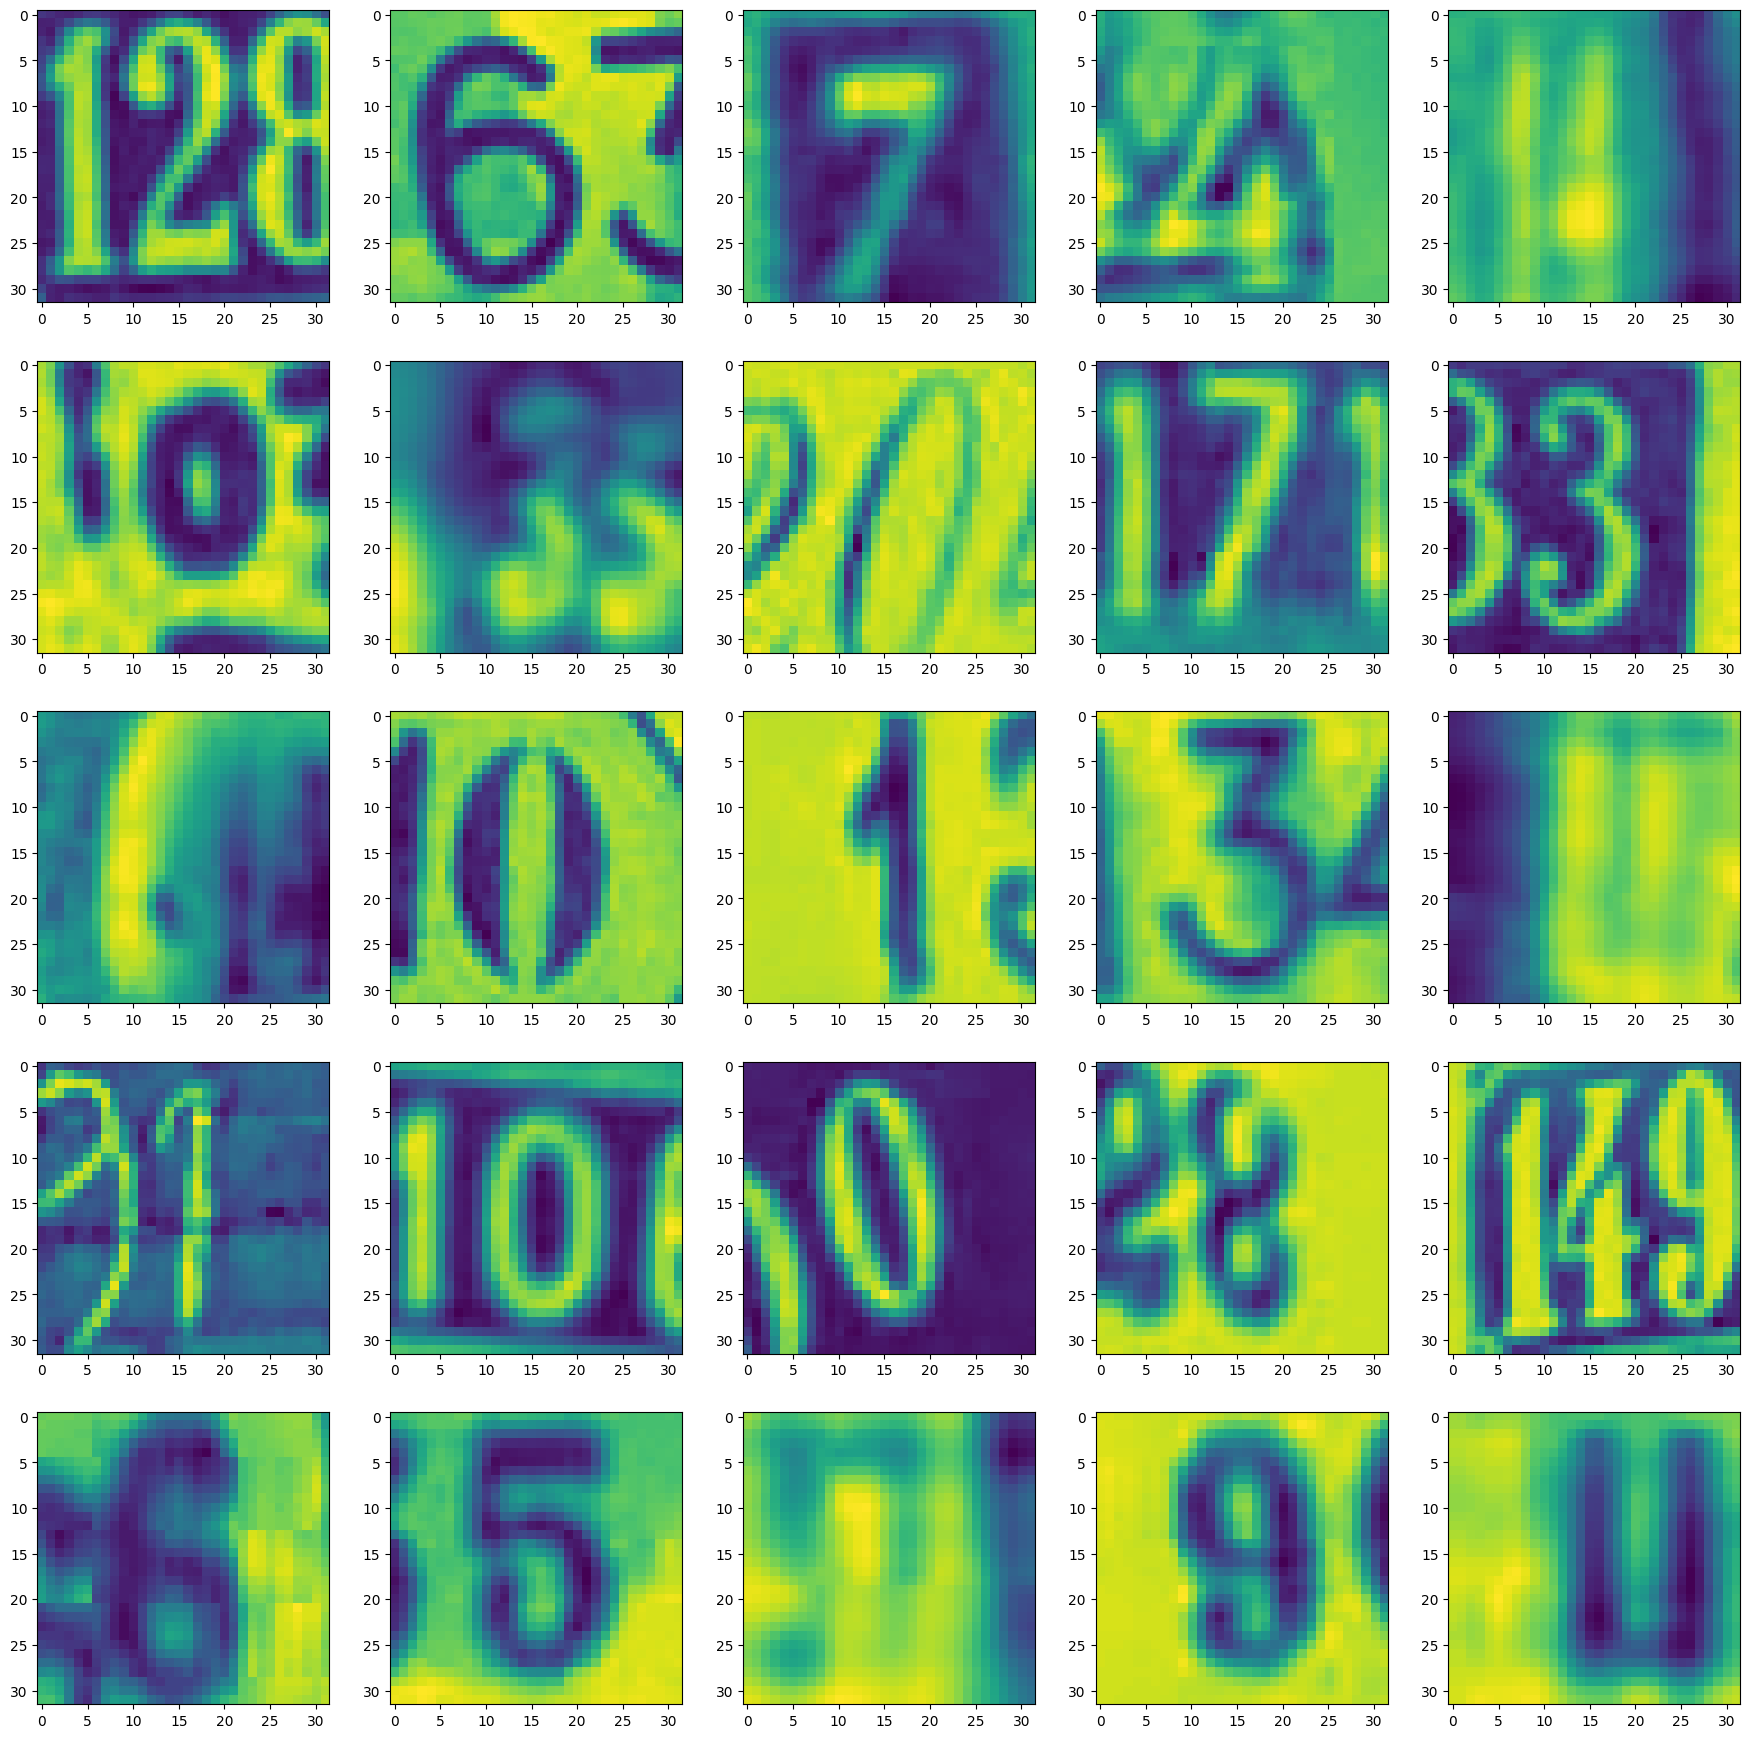

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(22, 22))

# Define row and cols in the figure
rows, cols = 5, 5

# Display first four 10
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(X_train[j])
plt.show()

# Data Preprocessing

In [10]:
# Checking Lowest and Highest Pixel Value
print("Lowest Pixel Value:", X_train[0].min(),"Highest Pixel Value:", X_train[0].max())

Lowest Pixel Value: 14.5482 Highest Pixel Value: 130.4922


# Feature Scaling with MinMaxScalar

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data and fit the scaler on the training data
train_x = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

# Scale the test data
test_x = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# If you have a validation set, scale it as well
if 'X_val' in locals():  # Check if X_val exists
    X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
else:
    print("X_val is not defined.")


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Input Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,842 (284.54 KB)

 Trainable params: 72,842 (284.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
 model.fit(X_train,y_train,epochs=20)

# expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 32)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5151 - loss: 1.9072
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8406 - loss: 0.5481
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8705 - loss: 0.4504
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8894 - loss: 0.3845
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8949 - loss: 0.3541
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.3332
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2869
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9205 - loss: 0.2658
Epoch 9/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9235 - loss: 0.2494
Epoch 10/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9283 - loss: 0.2335
Epoch 11/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9324 - loss: 0.2224
Epoch 12/20
1313/1313 ━━━━━━━━

In [15]:
# Cheking the shape
X_train.shape

(42000, 32, 32)

In [16]:
# Afteradd 1 - Diemension To return the same data with a new shape

X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)
X_test = X_test .reshape(-1, 32, 32, 1)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,528 (853.63 KB)

 Trainable params: 72,842 (284.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 145,686 (569.09 KB)

In [18]:
model.evaluate(X_train, y_train)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9516 - loss: 0.1490


[0.1492897868156433, 0.9516904950141907]

In [19]:
model.evaluate(X_test, y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.4757


[0.5073299407958984, 0.8974999785423279]

In [20]:
model.evaluate(X_val, y_val)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9253 - loss: 0.2892


[0.25670158863067627, 0.9354333281517029]

In [21]:
model.save('CNN_Model.h5')

# Overfitting Prevention

In [22]:
# # `EarlyStopping` is used based on `val_loss` to prevent overfitting
# # When a monitored metric0 has stopped improving, training is stopped
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='auto', patience=3, restore_best_weights=True, verbose=1)

# Model 1

In [23]:
#     Build a CNN with two convolutional + two max pooling layers, followed by two dense layers
#     out: model: the model we just built
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import initializers

# Initialize the model
model1 = Sequential()

# First Convolutional Layer
model1.add(Conv2D(16, kernel_size=(3, 3),
                  activation='relu',
                  kernel_initializer=initializers.RandomNormal(mean=0., stddev=0.1),
                  input_shape=(32, 32, 1)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model1.add(Conv2D(16, kernel_size=(3, 3),
                  activation='relu',
                  kernel_initializer=initializers.RandomNormal(mean=0., stddev=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

# Flatten the output
model1.add(Flatten())

# Fully connected layer with Dropout
model1.add(Dropout(0.5))  # Dropout before the dense layer
model1.add(Dense(64, activation='relu'))

# Another Dropout layer
model1.add(Dropout(0.5))

# Output layer
model1.add(Dense(10, activation='softmax'))




In [24]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,186 (156.98 KB)

 Trainable params: 40,122 (156.73 KB)

 Non-trainable params: 64 (256.00 B)

In [26]:
history = model1.fit(X_train, y_train,
          batch_size=35,
          validation_data=(X_val, y_val),
          callbacks=[es],
          epochs=25)

Epoch 1/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.1424 - loss: 2.6240 - val_accuracy: 0.5708 - val_loss: 1.5329
Epoch 2/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5381 - loss: 1.3554 - val_accuracy: 0.8077 - val_loss: 0.7488
Epoch 3/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6979 - loss: 0.9295 - val_accuracy: 0.8198 - val_loss: 0.6144
Epoch 4/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7425 - loss: 0.8111 - val_accuracy: 0.8465 - val_loss: 0.5220
Epoch 5/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7635 - loss: 0.7530 - val_accuracy: 0.8629 - val_loss: 0.4599
Epoch 6/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7724 - loss: 0.7114 - val_accuracy: 0.8553 - val_loss: 0.5103
Epoch 7/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7737 - loss: 0.7073 - val_accuracy: 0.8774 - val_loss: 0.4068
Epoch 8/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7854 - loss: 0.6775

In [27]:
model1.evaluate(X_train, y_train)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8814 - loss: 0.3923


[0.3973982036113739, 0.8803333044052124]

In [28]:
model1.evaluate(X_test,y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.4153


[0.42877110838890076, 0.8706666827201843]

In [29]:
model1.evaluate(X_val, y_val)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8732 - loss: 0.4218


[0.4068097472190857, 0.8774333596229553]

In [30]:
model1.save('CNN_SVHN_Model1.h5')

# Model 2

In [31]:
# Build an MLP model with a Flatten and four Dense layer

model2 = Sequential()

#Input Layer
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model2.add(MaxPooling2D((2,2)))

# Hillden Layer 1
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))
#Hidden Layer 2
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(64, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(32, activation='relu', kernel_initializer = initializers.RandomNormal(mean=0., stddev=0.1)))
model2.add(Dense(10, activation='softmax'))

In [32]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,570 (869.41 KB)

 Trainable params: 222,570 (869.41 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history=model2.fit(X_train,y_train,
        batch_size=62,
        validation_data=(X_val, y_val),
        callbacks=[es],
        epochs=25)

Epoch 1/25
678/678 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.3223 - loss: 2.6581 - val_accuracy: 0.7901 - val_loss: 0.7065
Epoch 2/25
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7967 - loss: 0.6756 - val_accuracy: 0.8378 - val_loss: 0.5548
Epoch 3/25
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8515 - loss: 0.5040 - val_accuracy: 0.8608 - val_loss: 0.4788
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


# Accuracy and  loss Visualization

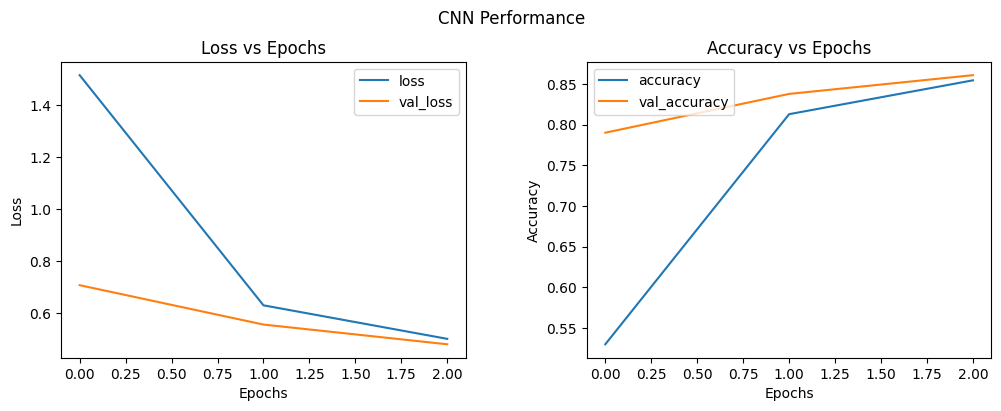

In [35]:
f, (f1, f2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

f1.plot(history.history['loss'])
f1.plot(history.history['val_loss'])
f1.set_title('Loss vs Epochs')
f1.set_xlabel('Epochs')
f1.set_ylabel('Loss')
l1=f1.legend(['loss','val_loss'], loc='upper right')


f2.plot(history.history['accuracy'])
f2.plot(history.history['val_accuracy'])
f2.set_title('Accuracy vs Epochs')
f2.set_xlabel('Epochs')
f2.set_ylabel('Accuracy')
l2=f2.legend(['accuracy','val_accuracy'], loc='upper left')


In [36]:
model2.evaluate(X_train, y_train)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7898 - loss: 0.7037


[0.7012883424758911, 0.7911666631698608]

In [37]:
model2.evaluate(X_test, y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7919 - loss: 0.7035


[0.7185932397842407, 0.7876111268997192]

In [38]:
model2.evaluate(X_val, y_val)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7940 - loss: 0.7046


[0.7064809203147888, 0.7900999784469604]

In [39]:
model2.save('CNN_SVHN_Model2.h5')

# Model 3

In [40]:
# Model3 with 2% dropout

# Build an MLP model with a Flatten and two Dense layer
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

In [41]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,986 (652.29 KB)

 Trainable params: 166,986 (652.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history=model3.fit(X_train,y_train,
        batch_size=66,
        validation_data=(X_val,y_val),
        callbacks=[es],
        epochs=25)

Epoch 1/25
637/637 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1337 - loss: 4.0563 - val_accuracy: 0.3348 - val_loss: 1.9253
Epoch 2/25
637/637 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5286 - loss: 1.3880 - val_accuracy: 0.8291 - val_loss: 0.6004
Epoch 3/25
637/637 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7763 - loss: 0.7277 - val_accuracy: 0.8621 - val_loss: 0.4830
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [44]:
model3.evaluate(X_train,y_train)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3331 - loss: 1.9230


[1.9246673583984375, 0.33430951833724976]

In [45]:
model3.evaluate(X_test,y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3302 - loss: 1.9286


[1.9266434907913208, 0.335833340883255]

In [46]:
model3.evaluate(X_val,y_val)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3589 - loss: 1.8671


[1.9252595901489258, 0.3347666561603546]

In [50]:
epoch_list = list(range(len(history.history['accuracy'])))
epoch_list


[0, 1, 2]

In [47]:
model3.save('CNN_SVHN_Model3.h5')

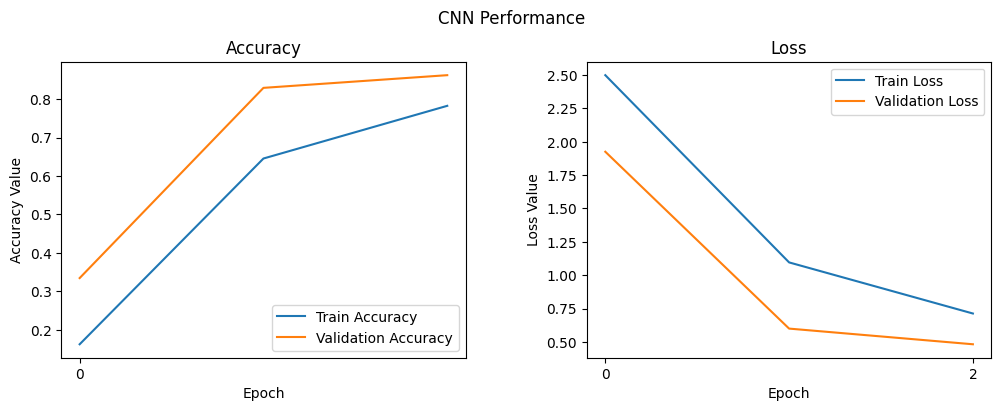

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(len(history.history['accuracy'])))  # Adjust epoch_list

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, len(epoch_list), 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(epoch_list), 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.show()


In [58]:
from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('/content/CNN_Model.h5')

# Performence Evaluation and Visualization

In [59]:
# Cheking if model is working
saved_model.evaluate(X_train, y_train)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9516 - loss: 0.1490


[0.1492897868156433, 0.9516904950141907]

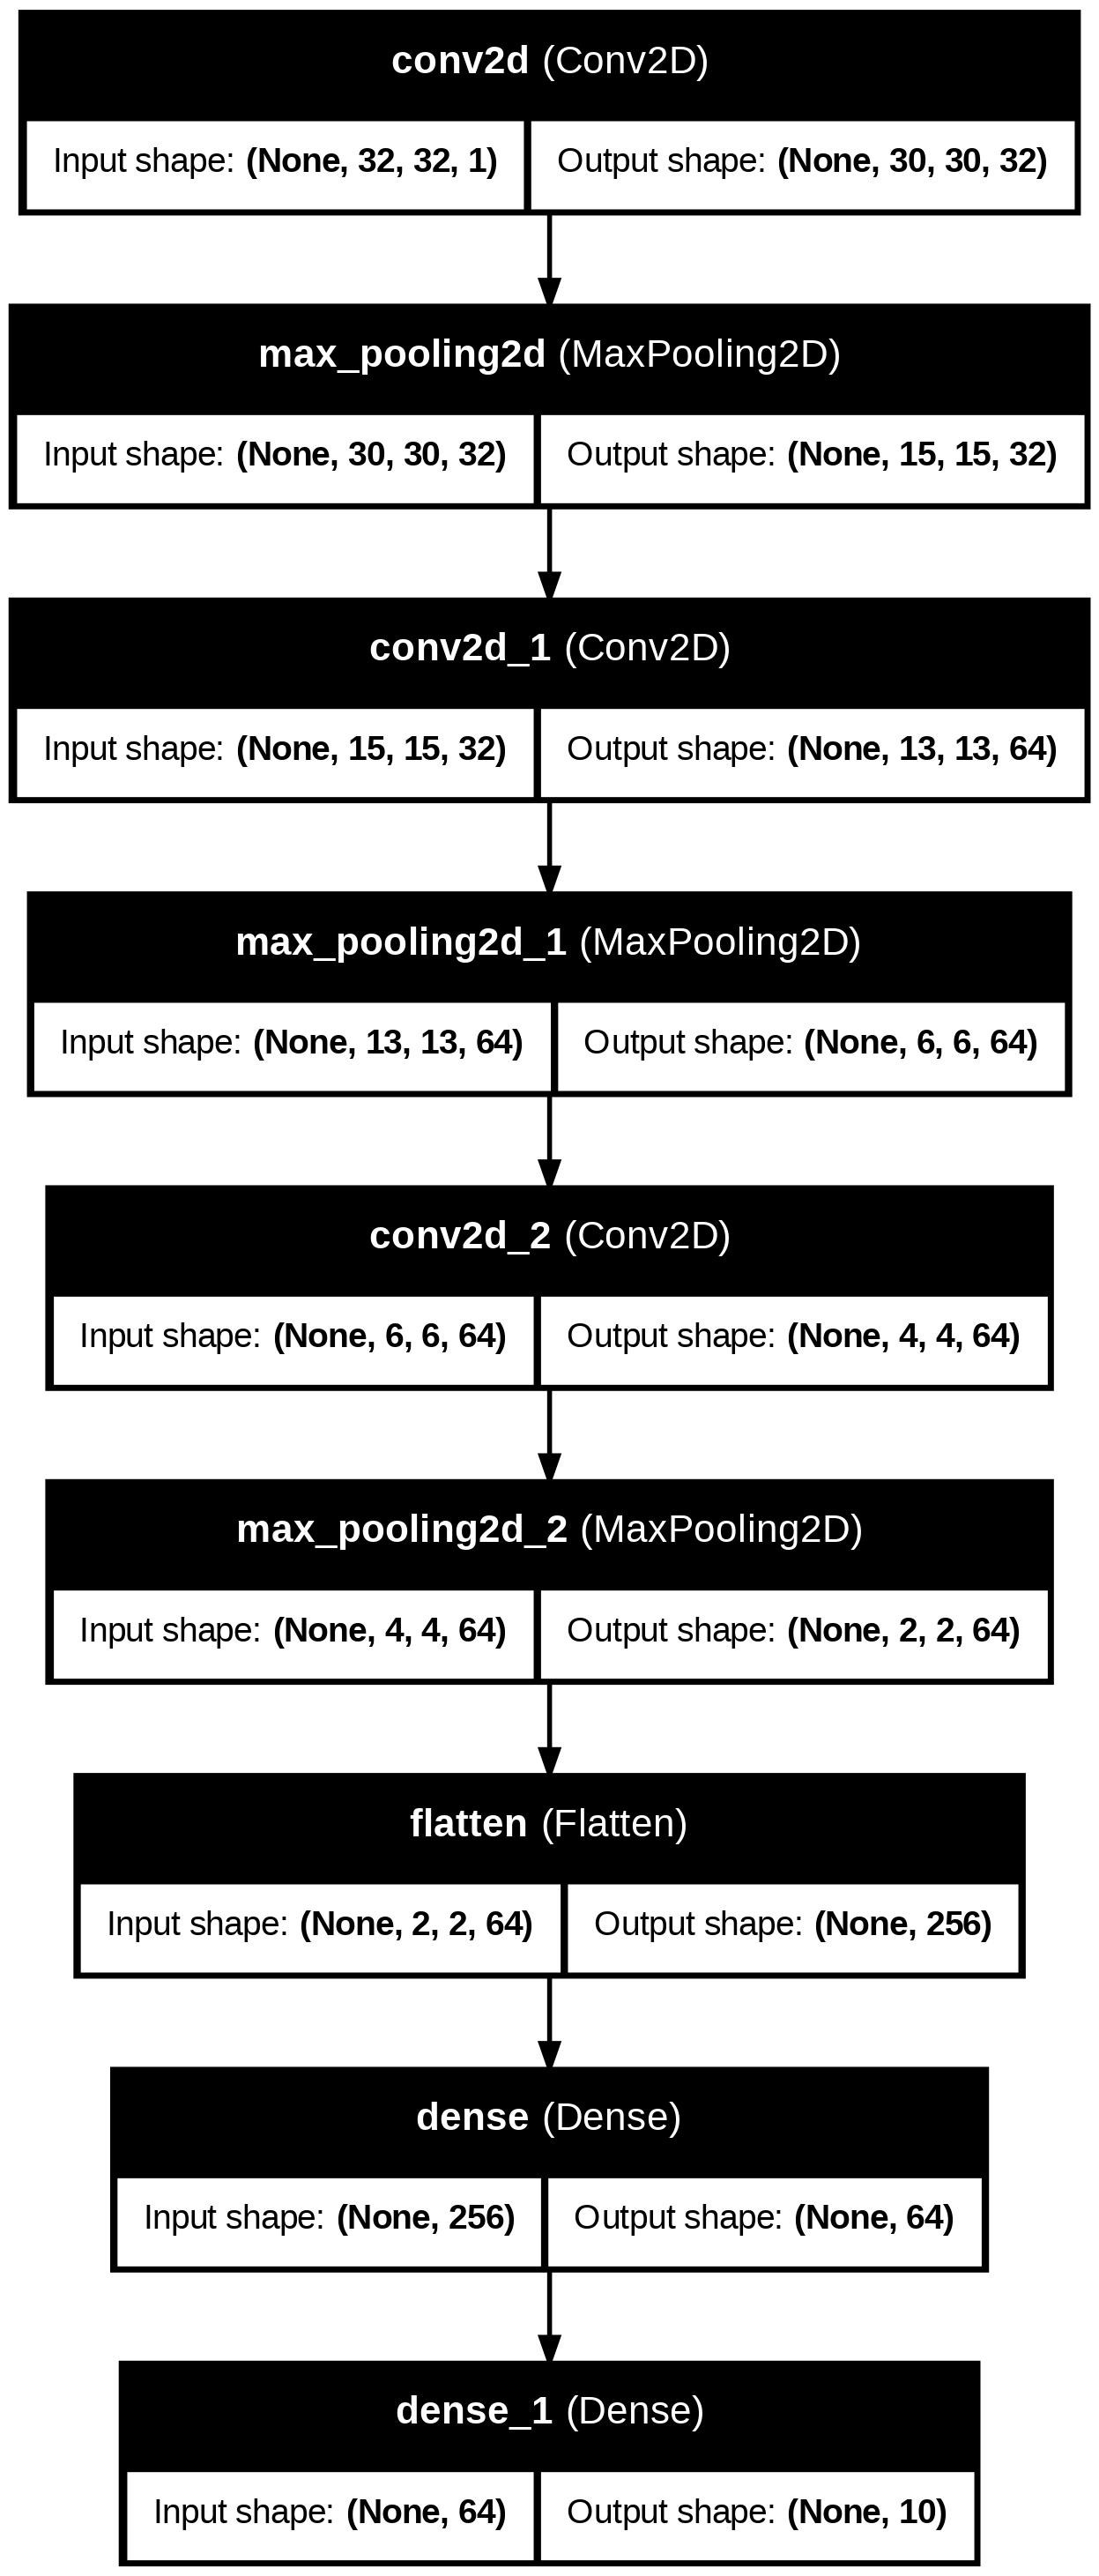

In [62]:
from tensorflow.keras.utils import plot_model

# Show model architecture
plot_model(saved_model, to_file='/content/CNN_Model.png', show_shapes=True, show_layer_names=True)


In [63]:
# Getting model predictions
test_predictions = saved_model.predict(X_test)
preds = np.argmax(test_predictions, axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [64]:
# Showing Classification Report
# To build a  report on the classification metrics
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1814
           1       0.90      0.89      0.89      1828
           2       0.87      0.93      0.90      1803
           3       0.85      0.88      0.86      1719
           4       0.91      0.92      0.92      1812
           5       0.91      0.89      0.90      1768
           6       0.92      0.87      0.89      1832
           7       0.90      0.93      0.91      1808
           8       0.87      0.89      0.88      1812
           9       0.92      0.87      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



# Image With Actual Label And Predicted Label

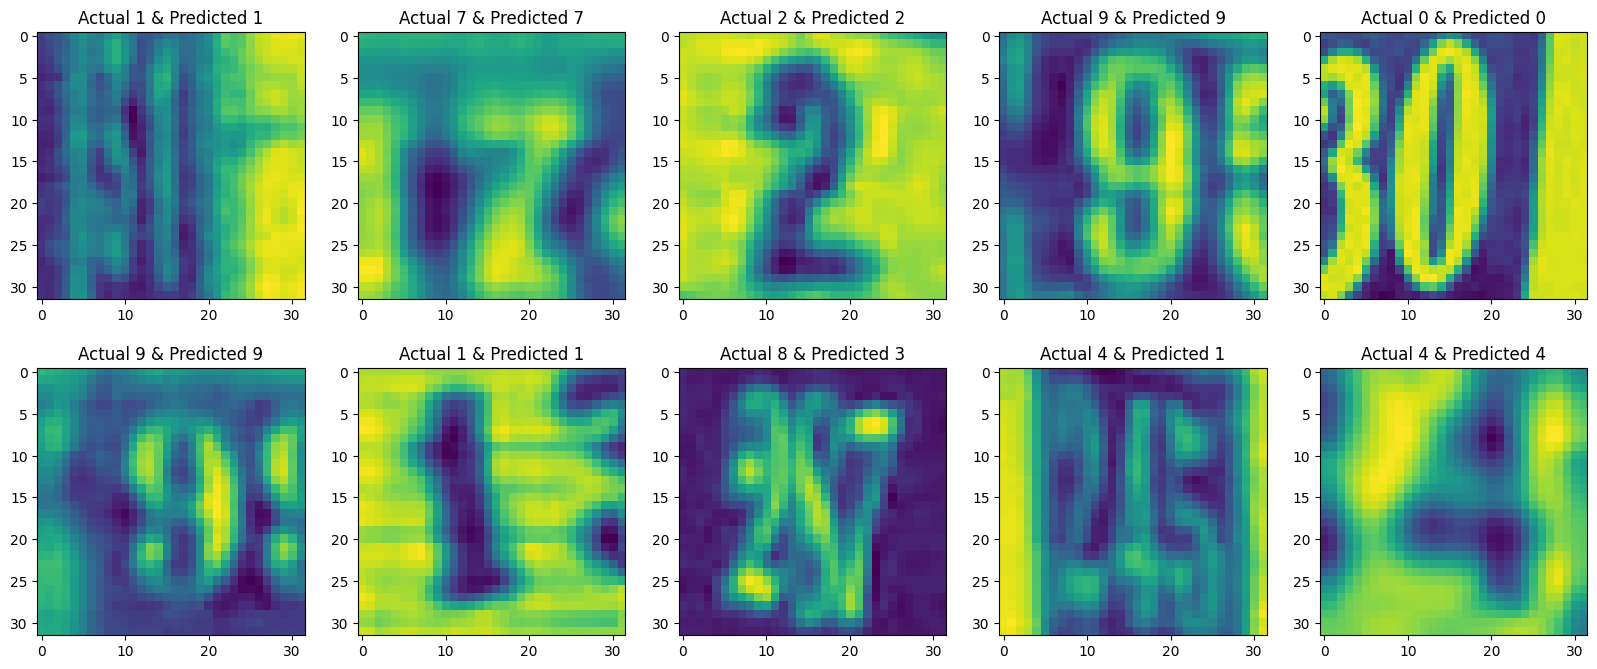

In [65]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib
y = y_test

fig = plt.figure(figsize=(20,8))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y[0],preds[0]))  ## Label
axes[0,0].imshow(test_x[0]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y[1],preds[1]))
axes[0,1].imshow(test_x[1])
axes[0,2].set_title('Actual {} & Predicted {}'.format(y[2],preds[2]))
axes[0,2].imshow(test_x[2])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y[3],preds[3]))
axes[0,3].imshow(test_x[3])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y[4],preds[4]))
axes[0,4].imshow(test_x[4])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y[5],preds[5]))
axes[1,0].imshow(test_x[5])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y[6],preds[6]))
axes[1,1].imshow(test_x[6])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y[7],preds[7]))
axes[1,2].imshow(test_x[7])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y[8],preds[8]))
axes[1,3].imshow(test_x[8])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y[9],preds[9]))
axes[1,4].imshow(test_x[9])
plt.show()
